<a href="https://colab.research.google.com/github/felipeparisantunes/portfolio_data_science/blob/main/Analisando_os_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires (Argentina), e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Buenos Aires" width="40%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeCYOq5fHBnn8DPVZ-gROsDZnzPoEtahmYMA&usqp=CAU"></center>

Buenos Aires é a capital e maior cidade da Argentina, além de ser a segunda maior área metropolitana da América do Sul, depois da Grande São Paulo. Ela está localizada na costa ocidental do estuário do Rio da Prata, na costa sudeste do continente. A conurbação da Grande Buenos Aires, que também inclui vários distritos da província de Buenos Aires, constitui a terceira maior aglomeração urbana da América Latina, com uma população de cerca de 13 milhões de pessoas.

## Obtenção dos Dados


In [ ]:
# Pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# Criando um DataFrame para o arquivo extraido do AirBNB
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-12-25/visualisations/listings.csv")

In [ ]:
for column in df:
  print(column)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365
number_of_reviews_ltm
license


## Análise dos Dados


**Dicionário das variáveis**

* id = Código único de registro do imóvel
* name = Nome do Imóvel
* host_id = Código do Proprietário do Imóvel
* Host_name = Nome do Proprietário do Imóvel
* neighbourhood_group = Sem valores
* neighbourhood = Nome do Bairro
* latitude = Latitude do Imóvel
* longitude = Longitude do Imóvel
* room_type = Tipo de Quarto do Imóvel
* price = Valor por Noite par alugar o imóvel
* minimum_nights = Número de noite mínimas para alugar o Imóvel
* number_of_reviews = Número de Revisões que o imóvel possui
* last_review = Data da última revisão
* reviews_per_month = Número de revisões por mês
* calculated_host_listings_count = Quantidade de Imóveis do mesmo Proprietario
* availability_365 = Número de Dias disponíveis do Imóvel em 1 ano
* number_of_reviews_ltm = Número de Revisões 
* license = Código de Licença, Muitos valores Ausentes

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# Volume de dados do DataFrame
print('O dataframe possui {} Registros.'.format(df.shape[0]))

# 5 primeiras entradas do dataset
df.head()

O dataframe possui 17318 Registros.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# Quantidade de Valores Ausentes por Coluna
df.isnull().sum().sort_values(ascending=False)[:8]


neighbourhood_group      17318
license                  17076
reviews_per_month         5240
last_review               5240
host_name                   13
name                         5
number_of_reviews            0
number_of_reviews_ltm        0
dtype: int64

In [ ]:
# Porcentagem de Valores Ausentes sobre o dataframe
df.isnull().sum().sort_values(ascending=False)[:8] / df.shape[0] * 100 

neighbourhood_group      100.000000
license                   98.602610
reviews_per_month         30.257536
last_review               30.257536
host_name                  0.075066
name                       0.028872
number_of_reviews          0.000000
number_of_reviews_ltm      0.000000
dtype: float64

Conforme a identificação de variáveis, os valores ausentes do Dateframe são de colunas que não impactam na análise dos dados, podendo as mesmas serem excluídas do dataframe.

### **Q3. Qual o tipo de distribuição das variáveis?** 

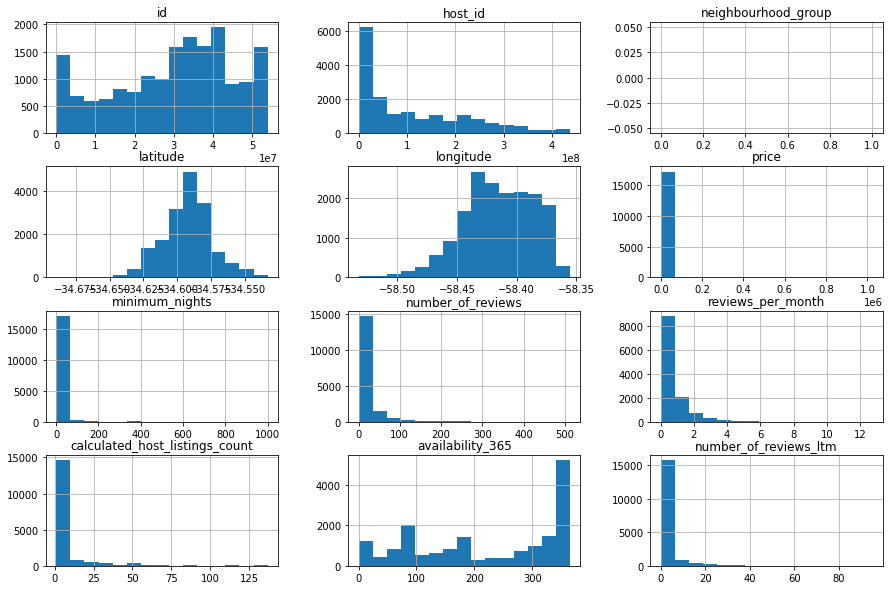

In [ ]:
# plotar o histograma das variáveis numéricas para identificação de Outliers
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()


6587.41863956577

Observa-se que a média de valores de aluguel para a Cidade de Buenos Aires é de 6587,48 Pesos Argentinos, pela cotação do dia 06/02/2021 1 Peso corresponde a 0,05 reais, logo, a média de valores convertidos para Real é de: R$ 333,03.

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# Matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# Apresentando Matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.015131,-0.022563,-0.021138,0.008736,0.001528
minimum_nights,0.015131,1.000000,-0.051140,-0.070982,0.000979,0.040837
number_of_reviews,-0.022563,-0.051140,1.000000,0.624887,-0.050739,-0.058703
reviews_per_month,-0.021138,-0.070982,0.624887,1.000000,0.019051,-0.063501
calculated_host_listings_count,0.008736,0.000979,-0.050739,0.019051,1.000000,0.055906
availability_365,0.001528,0.040837,-0.058703,-0.063501,0.055906,1.000000


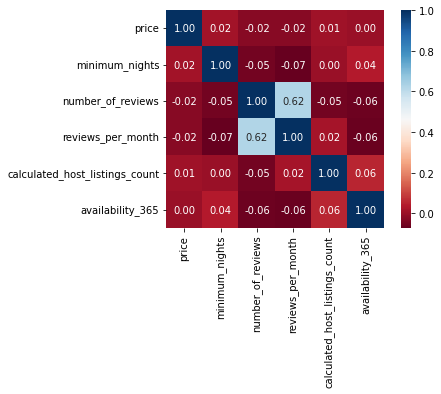

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Pelos campos indicados para correlação, os que mais se relacionam são reviews_per_mount e number_of_reviews, para extração de insights do modelo, são campos irrelevantes. Porém, são os campos numéricos disponíveis do dateframe para realizar a análise.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# Quantidade de Imóveis por Tipo de Imóvel
df.room_type.value_counts()

Entire home/apt    13808
Private room        3012
Shared room          333
Hotel room           165
Name: room_type, dtype: int64

In [ ]:
# Porcentagem de Imóveis por Tipo de Imóvel
df.room_type.value_counts() / df.shape[0] * 100


Entire home/apt    79.732071
Private room       17.392309
Shared room         1.922855
Hotel room          0.952766
Name: room_type, dtype: float64

In [ ]:
# Média de Valores por Tipo de Imóvel
df.groupby(['room_type']).price.mean().sort_values(ascending=False)[0:5]

room_type
Hotel room         47554.084848
Shared room         6725.006006
Entire home/apt     6710.935183
Private room        3761.776892
Name: price, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# Verificando qual bairro tem a média mais cara de imóveis para alugar
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[0:10]


neighbourhood
Constitucion        25615.371041
Villa Luro          20846.812500
Barracas            13389.902655
Puerto Madero       12228.447619
Monte Castro        11407.833333
Monserrat           10459.252941
Villa Santa Rita     8926.037037
Villa Real           7737.375000
San Nicolas          7140.247451
Chacarita            6981.232932
Name: price, dtype: float64

In [ ]:
# Verificando a quantidade de imóveis por bairro, para auxliar na Análise da Média de Valor por Bairro
df.neighbourhood.value_counts()[0:10]

Palermo         5521
Recoleta        2791
San Nicolas     1079
Retiro           943
Balvanera        794
Belgrano         778
Monserrat        680
Almagro          611
San Telmo        557
Villa Crespo     534
Name: neighbourhood, dtype: int64

Observa-se que dentre os 10 Bairros com valores mais altos, apenas 1 está entre os 10 Bairros com maior volume de imóveis disponíveis. Assim podemos ver que o volume de Imóveis por Bairro influencia diretamente na média de Valores.

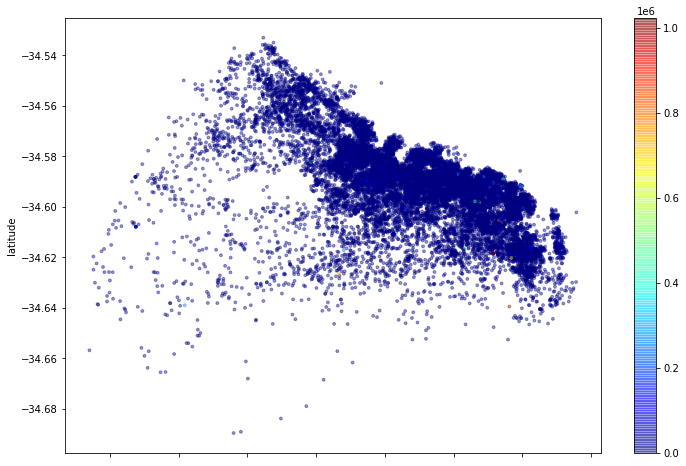

In [ ]:
# Imóveis por Lat - Long
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# Valor da Média de `minimum_nights`
media_noites = round(df.minimum_nights.mean(),1)

print('A média de Noite Mínimas para Alugar em Buenos Aires é de: {} noites.'.format(media_noites))


A média de Noite Mínimas para Alugar em Buenos Aires é de: 7.5 noites.


In [ ]:
# Valor Médio de 'minimum_nights' por Tipo de Imóvel
round(df.groupby(['room_type']).minimum_nights.mean(),1)

room_type
Entire home/apt    8.1
Hotel room         4.2
Private room       5.4
Shared room        4.2
Name: minimum_nights, dtype: float64

## Conclusões


Neste arquivo, realizamos a Análise dos Dados do AirBNB para a Cidade de Buenos Aires - Argentina.

A Cidade contém disponível para Alugar um Total de 17318 imóveis, sendo eles:
Casas ou Apartamentos Inteiros, Salas Privdas, Salas Compartilhadas e Quartos de Hotel.

As Casas ou Apartamentos representam 79,73% de todos imóveis para locação, seguido de Salas Privadas com 17,39% na sequência por Salas Compartilhadas com 1,92% e Quartos de Hotel com 0,95%.

Observa-se que a média de valores de aluguel para a Cidade de Buenos Aires é de 6587,48 Pesos Argentinos, pela cotação do dia 06/02/2021 1 Peso corresponde a 0,05 reais, logo, a média de valores convertidos para Real é de: R$ 333,03.

Verificando por Tipos de Imóveis, os Quartos de Hotel possuem o valor mais caro dentre as opções, o valor pode se justificar por ser em um Hotel e ter o serviço Hoteleiro a disposição do usuário, vejamos abaixo a média de valores por tipo de imóvel, e convertido para R$ também.

Quarto de Hotel        47554.084848 Pesos Argentinos 2.404,64 Reais 
Sala Compartilhada      6725.006006 Pesos Argentinos   340,06 Reais 
Casa ou Apartamento     6710.935183 Pesos Argentinos   339,35 Reais
Sala Privada            3761.776892 Pesos Argentinos   190,22 Reais

Observamos também que a média de Diárias mínimas é 7,5 noites para toda a Cidade de Buenos Aires, abaixo podemos ver a média por Tipo de Imóvel:

Casas ou Apartamentos é 8.1 Noites
Quartos de Hotel é 4.2 Noites
Salas Privadas é 5.4 Noites
Salas Compartilhadas é 4.2 Noites

